<a href="https://colab.research.google.com/github/AnaniasMv/Analise-carros/blob/main/analise_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# Carregamento do Dataset

In [ ]:
df = pd.read_csv('/content/archive.zip')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Visualização inicial dos dados

In [ ]:
df.shape # Quantidade de linhas e colunas

(11914, 16)

In [ ]:
df.columns  # Nome de todas as colunas

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.info()  # Tipo de dados e nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()  # Estatísticas básicas (média, desvio padrão, etc.)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#Limpeza de dados

In [ ]:
# Ver valores ausentes
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


In [ ]:
# Remover linhas com muitos valores faltando
df = df.dropna()

#Análises simples

##Modelos mais comuns

In [ ]:
df['Make'].value_counts().head(10)

,count
Make,
Chevrolet,1115
Ford,868
Volkswagen,805
Toyota,743
Dodge,626
Nissan,548
GMC,515
Honda,447
Mazda,403


## média de preço por marca

In [ ]:
df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).head(10)


,MSRP
Make,
Bugatti,1.757224e+06
Maybach,5.462219e+05
Rolls-Royce,3.511306e+05
Lamborghini,3.315673e+05
Bentley,2.471693e+05
McLaren,2.398050e+05
Ferrari,2.373838e+05
Spyker,2.133233e+05
Aston Martin,1.979104e+05


#Gráficos

##Preço médio por marca (top 10)

Text(0.5, 0, 'MSRP médio')

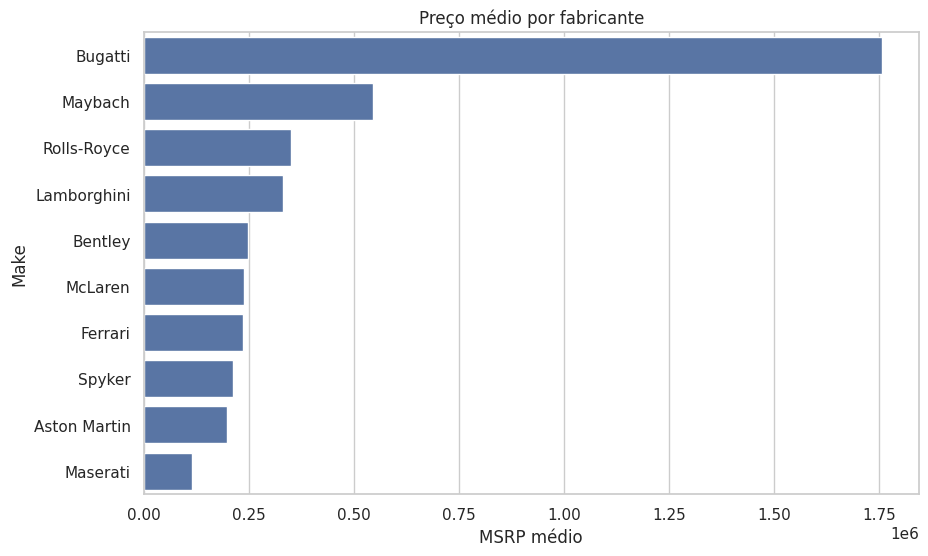

In [ ]:
top10 = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title('Preço médio por fabricante')
plt.xlabel('MSRP médio')


## Relação entre potência e preço

Text(0.5, 1.0, 'Potência do motor vs Preço')

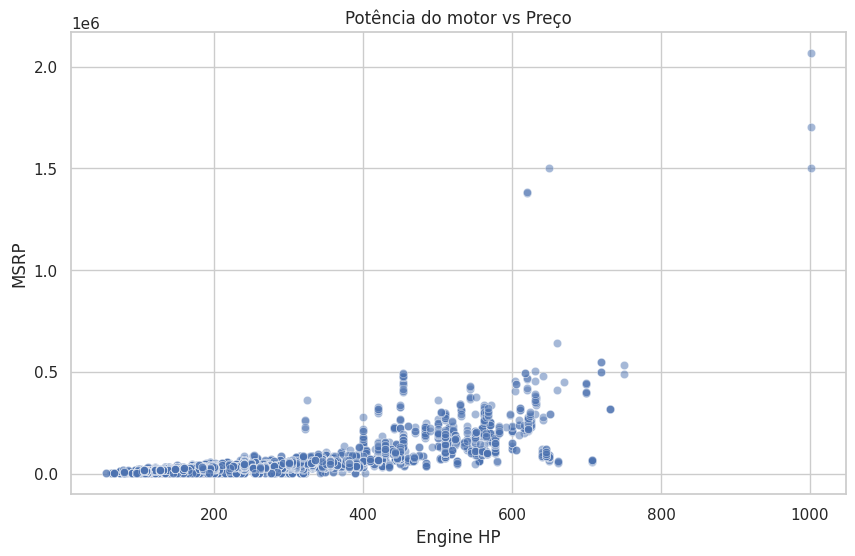

In [ ]:
sns.scatterplot(data=df, x='Engine HP', y='MSRP', alpha=0.5)
plt.title('Potência do motor vs Preço')
